In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vader = pd.read_csv('../output/vader.csv')
topic = pd.read_csv('../output/topic.csv')

In [3]:
vader.head()

,Unnamed: 0,app_id,review_id,review_score,vader_neg,vader_neu,vader_pos,vader_compound
0,0,com.midasplayer.apps.candycrushsaga,5273394649,5,0.069,0.495,0.436,0.9205
1,1,com.midasplayer.apps.candycrushsaga,5273271525,5,0.038,0.427,0.535,0.9682
2,2,com.midasplayer.apps.candycrushsaga,5272658314,5,0.033,0.746,0.221,0.8070
3,3,com.midasplayer.apps.candycrushsaga,5272631493,5,0.000,0.494,0.506,0.9545
4,4,com.midasplayer.apps.candycrushsaga,5272620906,1,0.184,0.725,0.091,-0.8887


In [4]:
topic.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Topic_Keywords,review_id,appid
0,0,0,6.0,0.7749,"game, level, ad, get, middle, , time, update, ...",5273394649,com.midasplayer.apps.candycrushsaga
1,1,1,6.0,0.9250,"game, level, ad, get, middle, , time, update, ...",5273271525,com.midasplayer.apps.candycrushsaga
2,2,2,2.0,0.8123,"game, level, candy, reset, money, get, booster...",5272658314,com.midasplayer.apps.candycrushsaga
3,3,3,6.0,0.9182,"game, level, ad, get, middle, , time, update, ...",5272631493,com.midasplayer.apps.candycrushsaga
4,4,4,2.0,0.4296,"game, level, candy, reset, money, get, booster...",5272620906,com.midasplayer.apps.candycrushsaga


In [5]:
combined = vader.join(topic[['Dominant_Topic', 'Topic_Perc_Contrib', 'Topic_Keywords']])

In [6]:
combined.head()

,Unnamed: 0,app_id,review_id,review_score,vader_neg,vader_neu,vader_pos,vader_compound,Dominant_Topic,Topic_Perc_Contrib,Topic_Keywords
0,0,com.midasplayer.apps.candycrushsaga,5273394649,5,0.069,0.495,0.436,0.9205,6.0,0.7749,"game, level, ad, get, middle, , time, update, ..."
1,1,com.midasplayer.apps.candycrushsaga,5273271525,5,0.038,0.427,0.535,0.9682,6.0,0.9250,"game, level, ad, get, middle, , time, update, ..."
2,2,com.midasplayer.apps.candycrushsaga,5272658314,5,0.033,0.746,0.221,0.8070,2.0,0.8123,"game, level, candy, reset, money, get, booster..."
3,3,com.midasplayer.apps.candycrushsaga,5272631493,5,0.000,0.494,0.506,0.9545,6.0,0.9182,"game, level, ad, get, middle, , time, update, ..."
4,4,com.midasplayer.apps.candycrushsaga,5272620906,1,0.184,0.725,0.091,-0.8887,2.0,0.4296,"game, level, candy, reset, money, get, booster..."


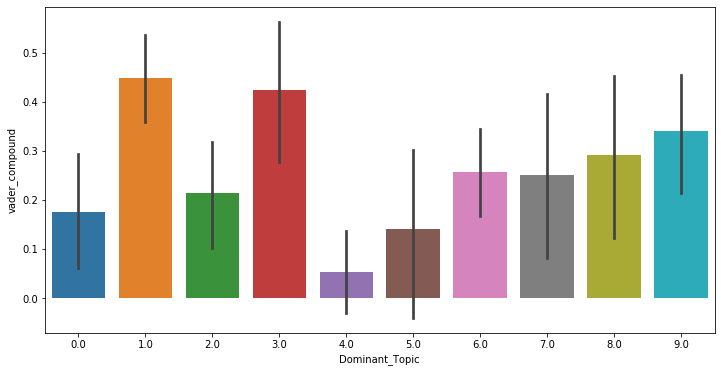

In [7]:
plt.rcParams["figure.figsize"] = (12,6)
sns.barplot(x='Dominant_Topic', y='vader_compound',data=combined)

In [8]:
topics = combined[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().sort_values('Dominant_Topic')

In [9]:
pd.set_option('display.max_colwidth', -1)
topics.style.hide_index()

Dominant_Topic,Topic_Keywords
0,"update, , new, back, game, level, bring, board, reset, gold"
1,"game, add, , many, level, really, ever, way, time, much"
2,"game, level, candy, reset, money, get, booster, life, year, back"
3,"commercial, addictive, review, push, em, all, game, ’, say, start"
4,"ad, game, many, level, , every, way, second, too, middle"
5,"level, game, app, reset, longer, money, life, king, deleting, harder"
6,"game, level, ad, get, middle, , time, update, every, make"
7,"booster, game, life, get, move, level, without, exit, year, done"
8,"game, life, level, update, buy, u, get, , let, got"
9,"candy, game, time, get, , move, suggestion, player, life, bank"


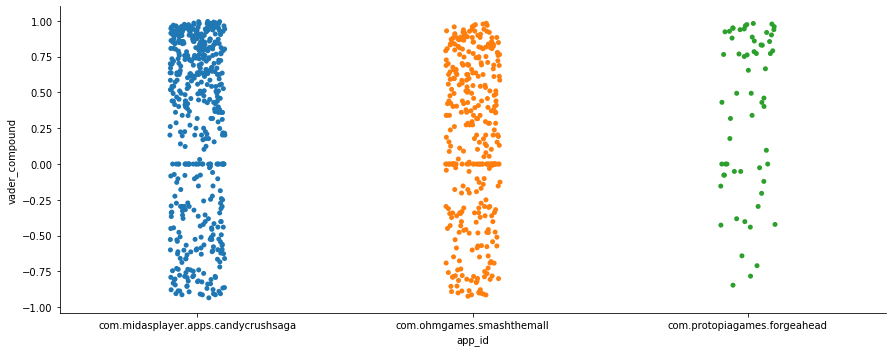

In [10]:
sns.catplot(x='app_id', y='vader_compound',data=combined , aspect =2.5);


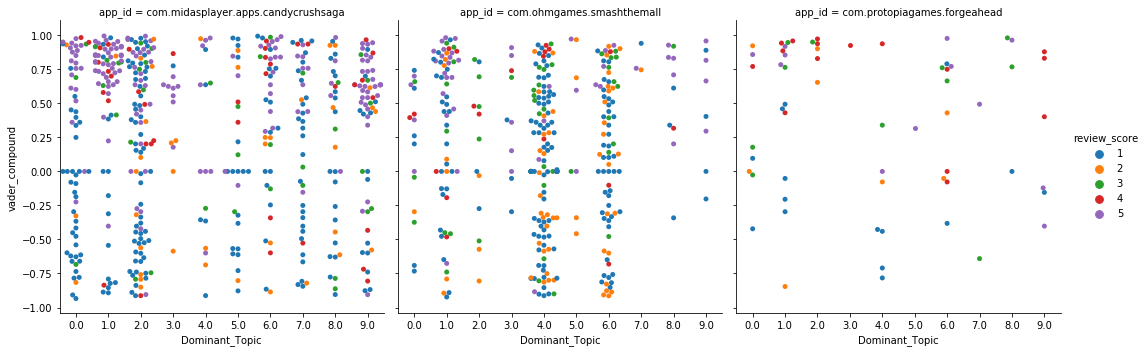

In [11]:
sns.catplot(x='Dominant_Topic', y='vader_compound', hue="review_score",
            col="app_id", aspect=1,
            kind="swarm", data=combined);

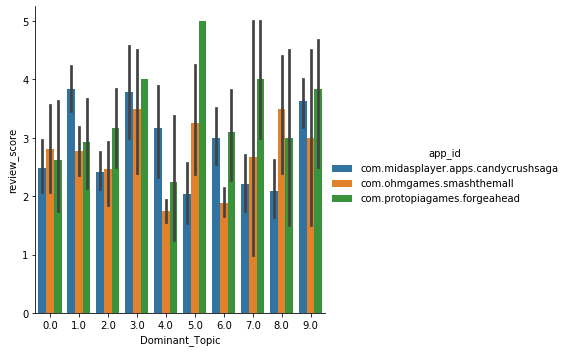

In [12]:
sns.catplot(x='Dominant_Topic', y='review_score',data=combined, hue="app_id", kind="bar");
